<a href="https://colab.research.google.com/github/mahima-srivastavaa/Global-Terrorism---EDA/blob/main/global_terrorism_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

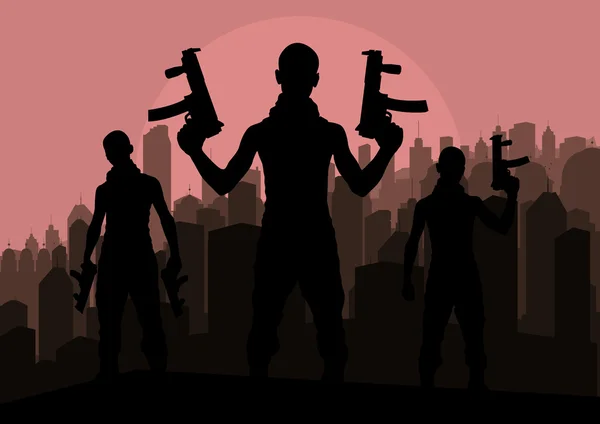

# What is Global terrorism? 💣 🌎

The term "global terrorism" describes acts of terrorism that take place all over the world and have an effect outside the boundaries of a specific nation or region. It entails violent acts, frequently directed at innocent bystanders, that are done to spread terror,wreak havoc, or further ideological, political, or religious objectives.

There are many different types of techniques used in international terrorism, including bombs, shootings, kidnappings, hijackings, and cyberattacks. It is frequently carried out by non-state actors who work across national boundaries and seek to overthrow governments, sow unrest, or advance their own objectives, such as terrorist organisations or extremist groups.


The Global Terrorism Database (GTD) is a comprehensive dataset that collects information on terrorist attacks worldwide. It provides valuable insights into the patterns, trends, and characteristics of global terrorism, including the types of attacks, targets, perpetrators, and the impact of terrorism on societies and communities.  The "Global Terrorism Database" (GTD) maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland.



# About the Dataset

The Global Terrorism Database (GTD) is a comprehensive dataset that collects information on terrorist attacks worldwide. It provides valuable insights into the patterns, trends, and characteristics of global terrorism, including the types of attacks, targets, perpetrators, and the impact of terrorism on societies and communities. The "Global Terrorism Database" (GTD) maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland.

the dataset has 209706 rows and 135 columns that try to give us the maximum information about a terror event.

In this project, i have tried to understand the spread of global terrorism

# Importing the Libraries📚

In [ ]:
!pip install opendatasets --upgrade --quiet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import folium
from folium.plugins import HeatMap
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from wordcloud import WordCloud



sns.set(style='darkgrid')

# Load the dataset 📤

In [ ]:
# download the dataset using opendatasets library
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sarfarazsheikh/global-terrorism-data-gtd-19702020'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahimas01
Your Kaggle Key: ··········


100%|██████████| 99.0M/99.0M [00:02<00:00, 41.3MB/s]


In [ ]:
#the file is in XLSX format
data_filename ='/content/global-terrorism-data-gtd-19702020/Global Terrorism Data (GTD) (1970-2020).xlsx'

In [ ]:
%%time
df = pd.read_excel(data_filename)

CPU times: user 4min 33s, sys: 2.37 s, total: 4min 36s
Wall time: 4min 49s


# Exploring the Dataset🕵️‍♀️

In [ ]:
%%time
df.head()

CPU times: user 297 µs, sys: 0 ns, total: 297 µs
Wall time: 284 µs


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(209706, 135)

In [ ]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 216.0+ MB
CPU times: user 214 ms, sys: 5.01 ms, total: 219 ms
Wall time: 233 ms


In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    197017
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       179102
Length: 135, dtype: int64

### Selecting and renaming the columns ✍🏽

In [ ]:
#rename the columns to make it easy to access the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','natlty1_txt': 'Nationality',
                       'region_txt':'Region','provstate':'State','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
#selecting columns of interest
df = df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
         'Wounded','Target','Group','success',
         'Target_type','Weapon_type','Motive','eventid']]

## What do the columns mean? 👀


**Year**: The year in which the terrorist attack occurred.

**Month**: The month in which the terrorist attack occurred.

**Day**: The day of the month on which the terrorist attack occurred.

**Country**: The country where the terrorist attack took place.

**State**: The state or province within the country where the terrorist attack occurred.

**Region**: The region of the world where the terrorist attack occurred.

**City**: The city where the terrorist attack took place.

**Latitude**: The latitude coordinate of the location where the terrorist attack occurred.

**Longitude**: The longitude coordinate of the location where the terrorist attack occurred.

**AttackType**: The type or method of the terrorist attack.

**Killed**: The number of people killed in the terrorist attack.

**Wounded**: The number of people wounded in the terrorist attack.

**Target**: The specific target or entity that was attacked.

**Group**: The terrorist group responsible for the attack.

**Success**: Indicates whether the attack was successful or not (1 for successful, 0 for unsuccessful).

**Target_type**: The general type or category of the target.

**Weapon_type**: The type of weapon or method used in the terrorist attack.

**Motive**: The motive or reason behind the terrorist attack.

**eventid**: A unique identifier for each terrorist attack event.

In [ ]:
print(df.shape)
df.head()

(209706, 19)


,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,success,Target_type,Weapon_type,Motive,eventid
0,1970,7,2,Dominican Republic,National,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,1,Private Citizens & Property,Unknown,NaN,197000000001
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,1,Government (Diplomatic),Unknown,NaN,197000000002
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,1,Journalists & Media,Unknown,NaN,197001000001
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,1,Government (Diplomatic),Explosives,NaN,197001000002
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,1,Government (Diplomatic),Incendiary,NaN,197001000003


In [ ]:
df = df.drop_duplicates()

Converting the df to csv to easily access it as it takes alot of time to read the xlsx file. It is easy to simply access the file when we need to run the notebook

In [ ]:
 df.to_csv('global_terrorism.csv', index=False)

# Fixing the missing values🔨

In [ ]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State               0
Region              0
city              426
latitude         4691
longitude        4692
AttackType          0
Killed          12527
Wounded         19936
Target            635
Group               0
success             0
Target_type         0
Weapon_type         0
Motive         154648
eventid             0
dtype: int64

city and target column missing values are replaced with unknown.
motive,
 killed, wounded are numerical values, we can assume that if they the values are missing, that means the reported numbers are 0, hence we will replace these missing values with 0.

In [ ]:
#filling the missing values with 'Unknown' instead of removing the columns
df['city'] = df['city'].fillna('unknown')
df['Target'] = df['Target'].fillna('unknown')
# assuming that if the number of people killed or wounded are 0
df['Killed'] = df['Killed'].fillna(0)
df['Wounded'] = df['Wounded'].fillna(0)

I added a new column called Casualities

In [ ]:
# adding a new column
df.loc[:, 'Casualities'] = df['Wounded'] + df['Killed']

In [ ]:
df.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,success,Target_type,Weapon_type,Motive,eventid,Casualities
0,1970,7,2,Dominican Republic,National,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,1,Private Citizens & Property,Unknown,NaN,197000000001,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,1,Government (Diplomatic),Unknown,NaN,197000000002,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,1,Journalists & Media,Unknown,NaN,197001000001,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,1,Government (Diplomatic),Explosives,NaN,197001000002,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,1,Government (Diplomatic),Incendiary,NaN,197001000003,0.0


In [ ]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,success,eventid,Casualities
count,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,209706.000000,209706.00000,209706.000000,2.097060e+05,209706.000000
mean,2004.800993,6.455285,15.527930,23.358696,30.416738,2.285810,2.79251,0.883628,2.004867e+11,5.078319
std,13.519321,3.387098,8.801104,18.137061,56.113029,11.012018,38.93325,0.320672,1.351933e+09,44.832867
min,1970.000000,0.000000,0.000000,-53.154613,-176.176447,0.000000,0.00000,0.000000,1.970000e+11,0.000000
25%,1992.000000,4.000000,8.000000,11.510046,8.748117,0.000000,0.00000,1.000000,1.992080e+11,0.000000
50%,2012.000000,6.000000,15.000000,31.300213,43.746215,0.000000,0.00000,1.000000,2.012010e+11,1.000000
75%,2015.000000,9.000000,23.000000,34.557022,68.835918,2.000000,2.00000,1.000000,2.015123e+11,4.000000
max,2020.000000,12.000000,31.000000,74.633553,179.366667,1700.000000,10878.00000,1.000000,2.020123e+11,12263.000000


In [ ]:
df['Country'].value_counts().idxmax()

'Iraq'

# Visualising the data 🔮

In this section, we will ask and answer questions to understand the Global Terroism and how it has impacted the world

## How many Terrorist attacks does the world face every year?

In [ ]:
attacks_per_year = df.groupby('Year').size().reset_index(name="Count")
fig = px.bar(attacks_per_year, x= 'Year', y= 'Count',
             title= 'Terrorist attacks over the years')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Number of Attacks')
fig.show()

In [ ]:
print('The year with the most number of attacks is', df['Year'].value_counts().idxmax())
print('The year with the least number of attacks is', df['Year'].value_counts().idxmin())

The year with the most number of attacks is 2014
The year with the least number of attacks is 1971


- looks like that the dataset does not have data for the year 1993.
- from 2010 to 2014 there has been a massive spike in the number of terrorist attacks and then we see a downward slope.

## howmany times were these terrorists successful?

In [ ]:

# Calculate the count of successful attacks
success_counts = df['success'].value_counts()

# Create a pie chart
fig = px.pie(success_counts, values=success_counts.values, names=success_counts.index,
             title='Successful Attacks Distribution')
fig.show()

- 185,302 global terrorist attacks have been successful which makes 88% of the total number of global terrorist attacks.

## How are the terrorist attacks distributed across the countries? ⚔️

### Lets Visualise howmany attacks each country has suffered using a choropleth map

In [ ]:
# Calculate the number of attacks per country
attacks_per_country = df['Country'].value_counts().reset_index()
attacks_per_country.columns = ['Country', 'Number of Attacks']

# Create a choropleth map using Plotly
fig = px.choropleth(attacks_per_country, locations='Country', locationmode='country names',
                    color='Number of Attacks', hover_name='Country', projection='natural earth')

# Set the title and colorbar title
fig.update_layout(title_text='Number of Attacks by Country', coloraxis_colorbar_title='Number of Attacks')

# Display the map
fig.show()

In [ ]:
print("Country with the most attacks is" , df['Country'].value_counts().idxmax())
print("Country with the least number of attacks is" , df['Country'].value_counts().idxmin())

Country with the most attacks is Iraq
Country with the least number of attacks is Vatican City


## Which are the top 15 worst affected countries? 😥





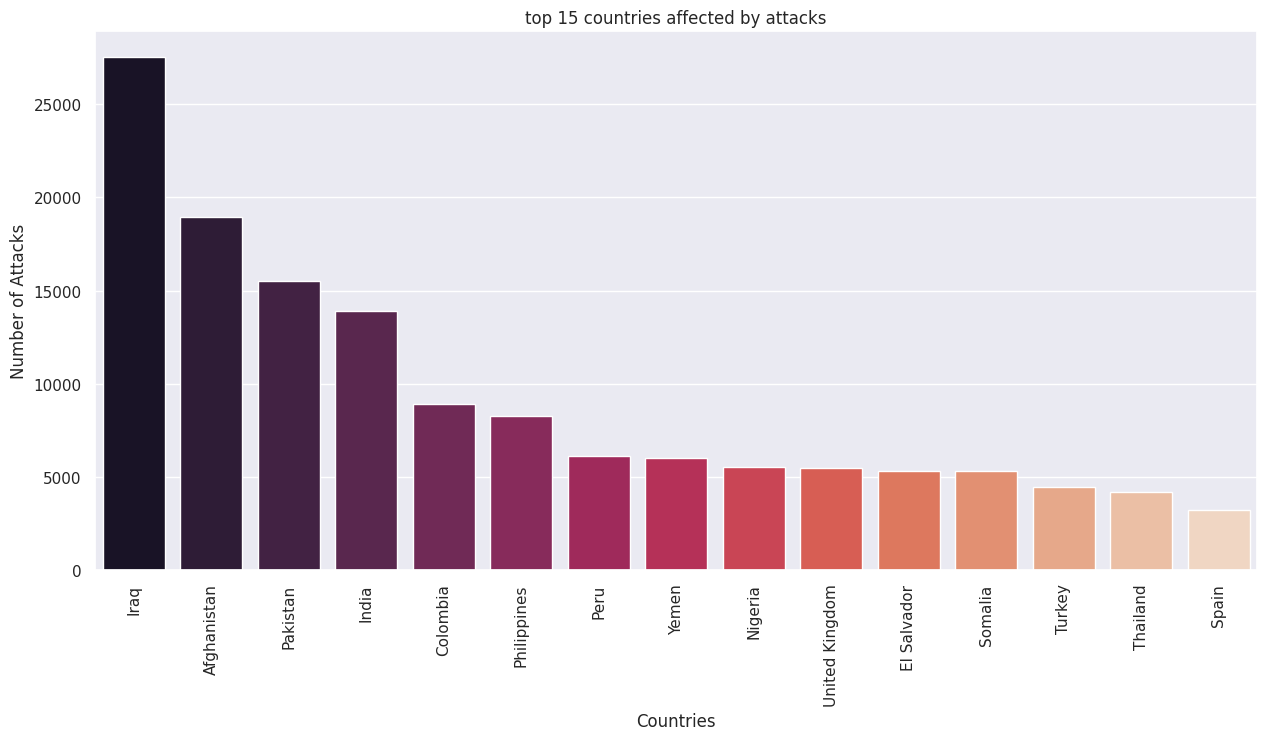

In [ ]:
plt.subplots(figsize=(15,7))
top_15_countries = df['Country'].value_counts()[:15].to_frame().reset_index()
top_15_countries.columns= ['Country', 'Count']
sns.barplot(x='Country', y ='Count', data = top_15_countries, palette="rocket" )
plt.title('top 15 countries affected by attacks')
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

Iraq, Afghanistan, Pakistan and India have had over 10000 terrorist Attacks from 1970 to 2020

Lets visualise how severe the attacks in these 4 countries are compared to the rest of the world

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have a DataFrame called 'df' containing the terrorism data

# Calculate the sum of attacks in Iraq, Pakistan, Afghanistan, and India
selected_countries = ['Iraq', 'Pakistan', 'Afghanistan', 'India']
sum_selected_countries = df[df['Country'].isin(selected_countries)]['Killed'].sum()

# Calculate the sum of attacks in the rest of the world
rest_of_world = df[~df['Country'].isin(selected_countries)]['Killed'].sum()

# Create a Pie chart using Plotly
labels = ['Iraq, Pakistan, India and Afghanistan', 'Rest of the World']
values = [sum_selected_countries, rest_of_world]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(title='Comparison of Peopled killed in the Big 4 vs Rest of the World')

fig.show()


The big 4 Countries contribute to 40.6% of the deaths of the world all over the world due to terrorist attacks

## 📌 Let's visualise ALL the terrorist attacks all over the world from 1970 to 2020

In [ ]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', hover_name="city", hover_data=["Weapon_type",'Group','success','Casualities'],
                        color_discrete_sequence=["red"], zoom=1, height=500)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## How have these attacks affected each region over the years?📍

In [ ]:
df_region_year = pd.crosstab(df['Year'], df['Region'])
fig = px.area(df_region_year, x=df_region_year.index, y=df_region_year.columns,
              title='Terrorist Activities by Region in each Year',
              labels={'value': 'Number of Attacks', 'hue': 'Region'})
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Attacks')
fig.show()

- **Western Europe** saw a steep rise in the number of attacks between the years 1970 to 1979 and then a drop until 1982 after which the number of attacks remained steady until 1990 which witnessed a rise until 1992 and then there was a steady downfall and the attacks remain below 350 per year since the year 2000
- **Sub-saharan Africa** has seen a steep rise the year 2009 from 302 attacks per year to over 2000 attacks a year in 2014. The number of attacks remain constant since around the 2000 mark until 2020.
- The **South-East Asia** saw a steep rise from 2011 when the region had 356 attacks and then year 2013 had 1188 attacks. however, there is now a steady drop and the year 2020 had 419 attacks
- **South Asia** has seen a steady rise in the number attacks from the year 136 in 1998 to 4997 attacks in 2014. There has been a small decline in attacks.
- **South America** witnessed over 1000 attacks between 1984 and 1993 and then a steep fall. The attacks remain below 310 since 1998.
- The **North American region** witnessed the most attacks in 1972 in 1971. The attacks remain below 200 since 1972.
- The **Middle East and North Africa** has faced the most number of attacks with the highest number in 2014 of 6996 attacks. This could be the factor that added to 2014 being the most dangerous year.
- The **Eastern Europe** generally had less than 300 attacks until 2013 and suddenly saw a spike in 2014 where total number of attacks were 963.
- East Asia has seen less than 100 attacks each year.
- **Central Asia** was a victim to 0 attacks until 1990 and the 77 attacks in 1992. There has been a fall and number of attacks per year remain less than 50 since 1997.
- **Central America and Caribbean Region** saw a large number of yearly attacks between 1980 and 1992 of over which ranged from 200 attacks a year to 1148. Since 1998 the region has faced less than 20 attacks.
- **Australia and Oceania** have faced less than 30 attacks a year

### Attacks by region over the years

In [ ]:
def count_attacks(df):
    counts = []
    for i in df.groupby(['Year', 'Country'])['eventid'].count():
        for j in range(i):
            counts.append(i)
    return counts

df = df.sort_values(['Year', 'Country'], ascending=[True, True])
df['attacks'] = count_attacks(df)

# Create the scatter_geo plot using Plotly Express
fig = px.scatter_geo(df, locations='Country',locationmode='country names', color='Region', size='attacks',
                     animation_frame='Year', projection='natural earth')

# Set the title
fig.update_layout(title_text='Number of Attacks by Region (1970 - 2020)')

# Display the plot
fig.show()

### How many people have died due to terrorist attacks in each region?

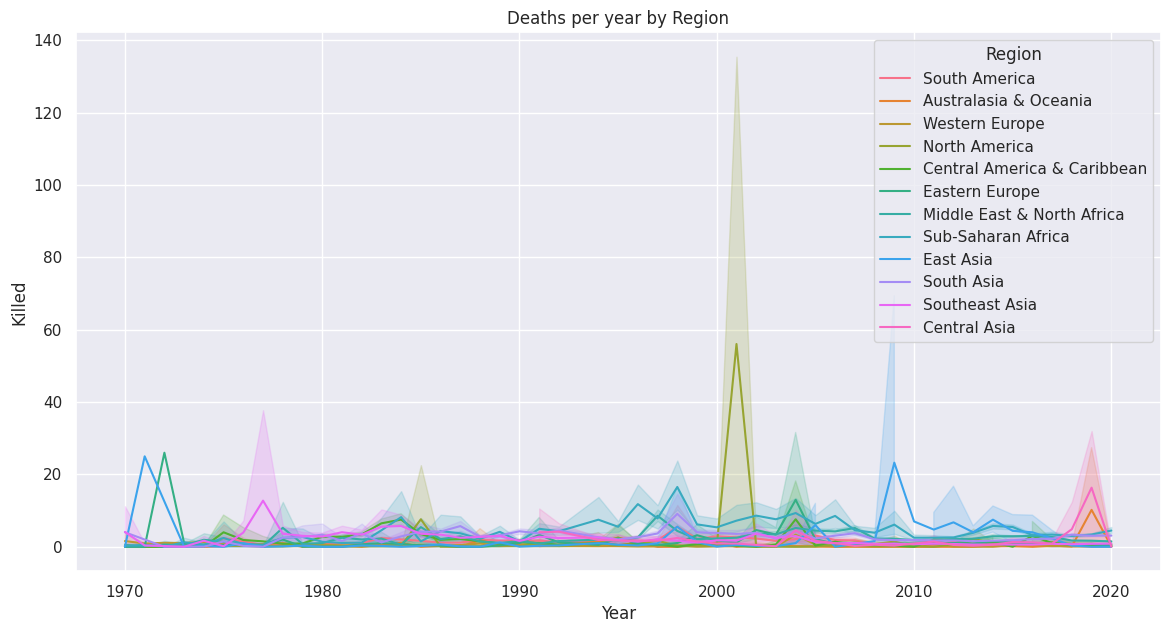

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x= 'Year', y = 'Killed', data = df, hue = 'Region')
plt.title('Deaths per year by Region');

the Middle East and North African region saw the most number of deaths in 2014 at 1700 deaths.

## what is the distribution of Target Types?

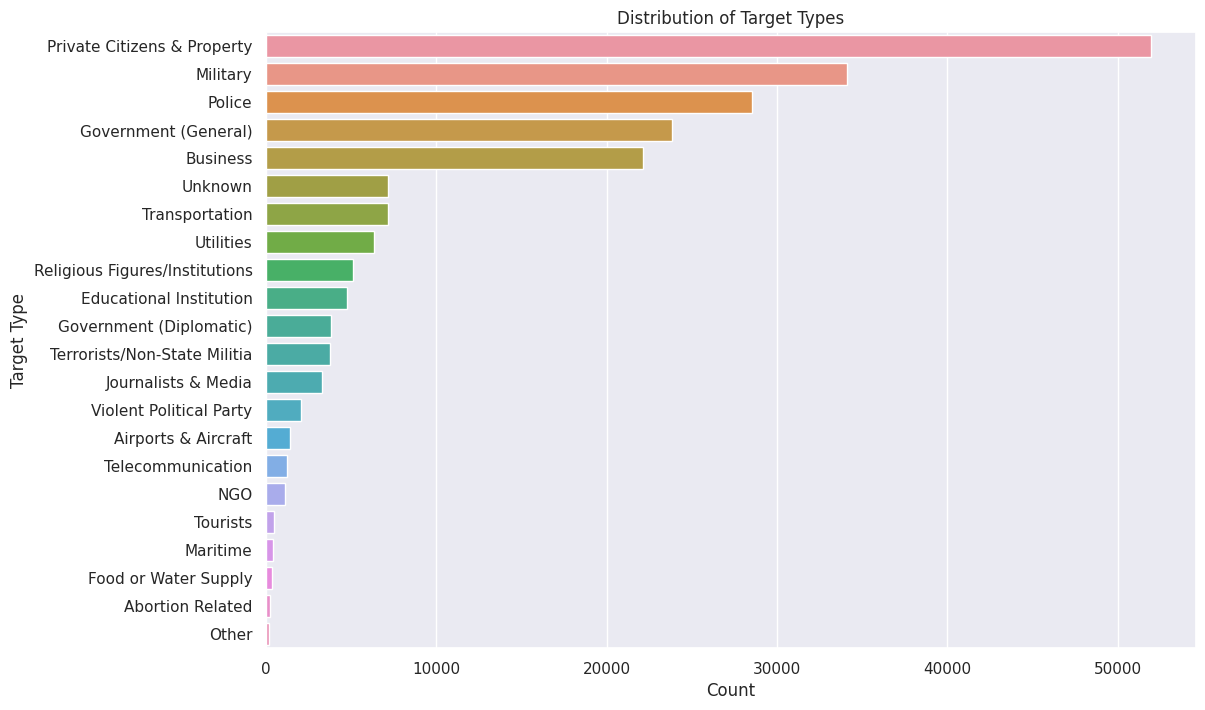

In [ ]:
# Calculate the count of each target type
target_counts = df['Target_type'].value_counts().sort_values(ascending=False)

# Plot the count of each target type
plt.figure(figsize=(12, 8))
sns.barplot(x=target_counts, y=target_counts.index)
plt.title('Distribution of Target Types')
plt.xlabel('Count')
plt.ylabel('Target Type')
plt.xticks(rotation=0)
plt.show()

Private properties and citizens are the most preffered Target type over the years with over 50000 attacks.

### What is the average number of deaths per attack for a given target type?

In [ ]:
average_deaths_per_attack = df.groupby('Target_type')['Killed'].mean()
average_deaths_per_attack = average_deaths_per_attack.sort_values(ascending=True)

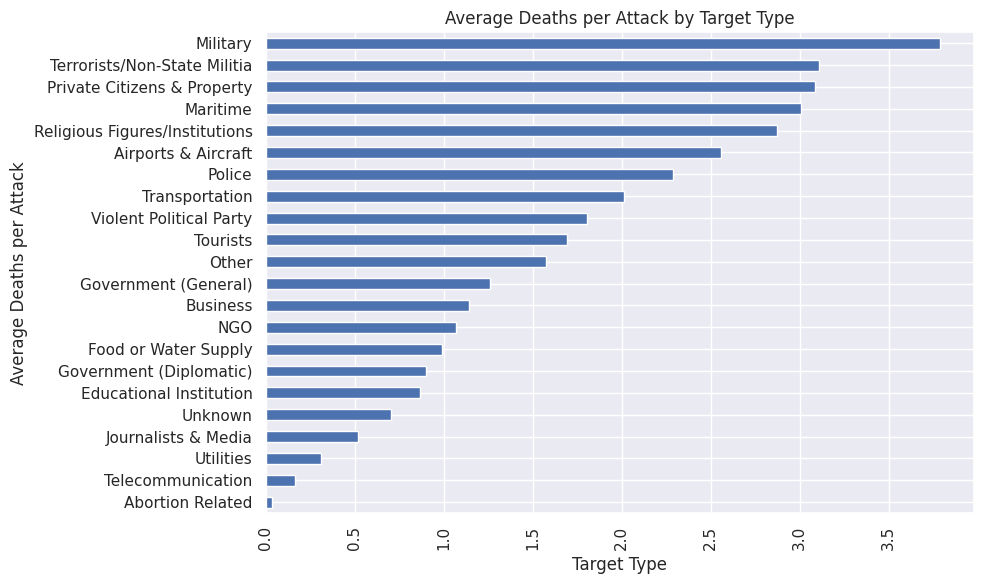

In [ ]:
plt.figure(figsize=(10, 6))
average_deaths_per_attack.plot(kind='barh')
plt.xlabel('Target Type')
plt.ylabel('Average Deaths per Attack')
plt.title('Average Deaths per Attack by Target Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

On an average, Attacks on Military results in the most number of deaths

## What are the most common ways terrorists attack?

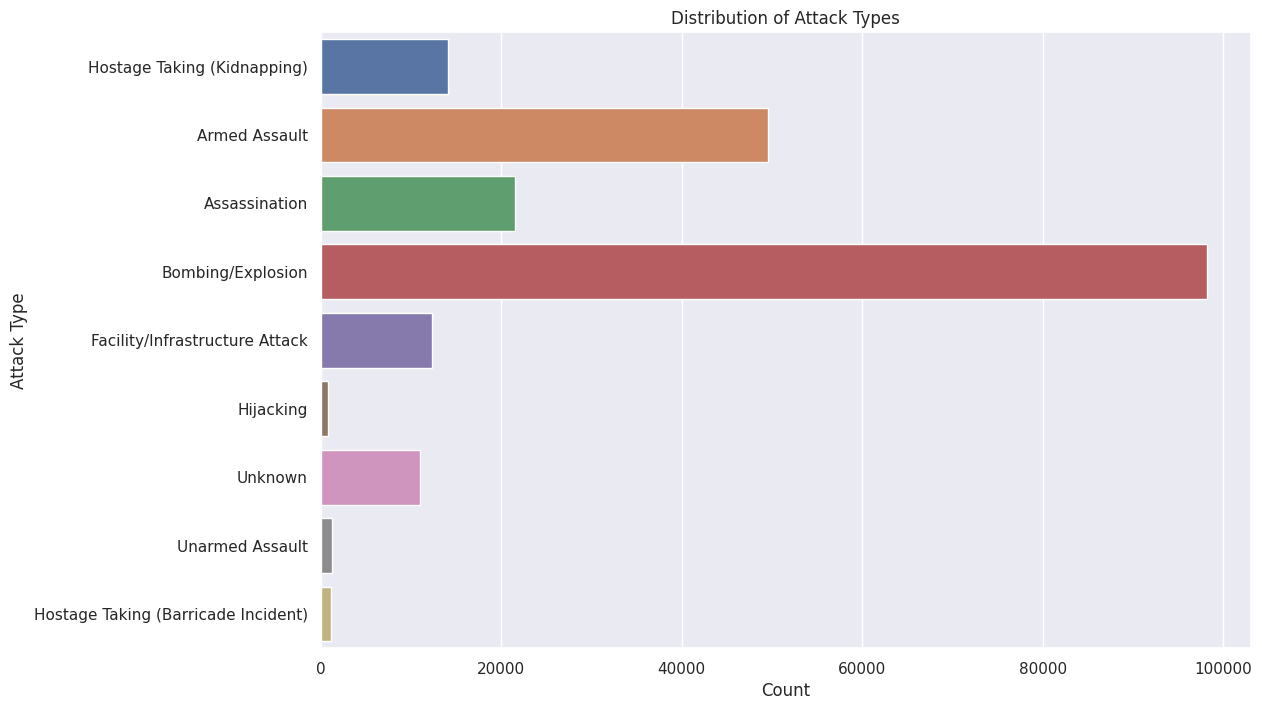

In [ ]:
# Plot the count of each target type
plt.figure(figsize=(12, 8))
sns.countplot(y='AttackType', data=df)
plt.title('Distribution of Attack Types')
plt.ylabel('Attack Type')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

Bombing is the most preffered form of attack type.

## What are the most commonly used wepons?

In [ ]:
Weapon_type_counts = df['Weapon_type'].value_counts().to_frame().reset_index()
Weapon_type_counts.columns = ['Weapon_type', 'Number of times used']
fig = px.pie(Weapon_type_counts, values = 'Number of times used', names = 'Weapon_type')
fig.show()

since Bombing is the preffered attack type, it is obvious that Explosives are the most preffered type of weapon used followed by Firearms

## Which are the top 10 nastiest groups?

In [ ]:
# Calculate the count of each group
group_counts = df.loc[:,'Group'].value_counts()
top_10_groups = group_counts[1:11].index.tolist()

# Filter the data for the top 10 groups
top_10_data = df[df.loc[:,'Group'].isin(top_10_groups)]

# Group the data by year and group, and calculate the count
group_activity = top_10_data.groupby(['Year', 'Group']).size().unstack()

# Convert the 'Year' column to datetime
top_10_data.loc[:,'Year'] = pd.to_datetime(top_10_data.loc[:,'Year'], format='%Y')

<ipython-input-37-85b5eda03e15>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



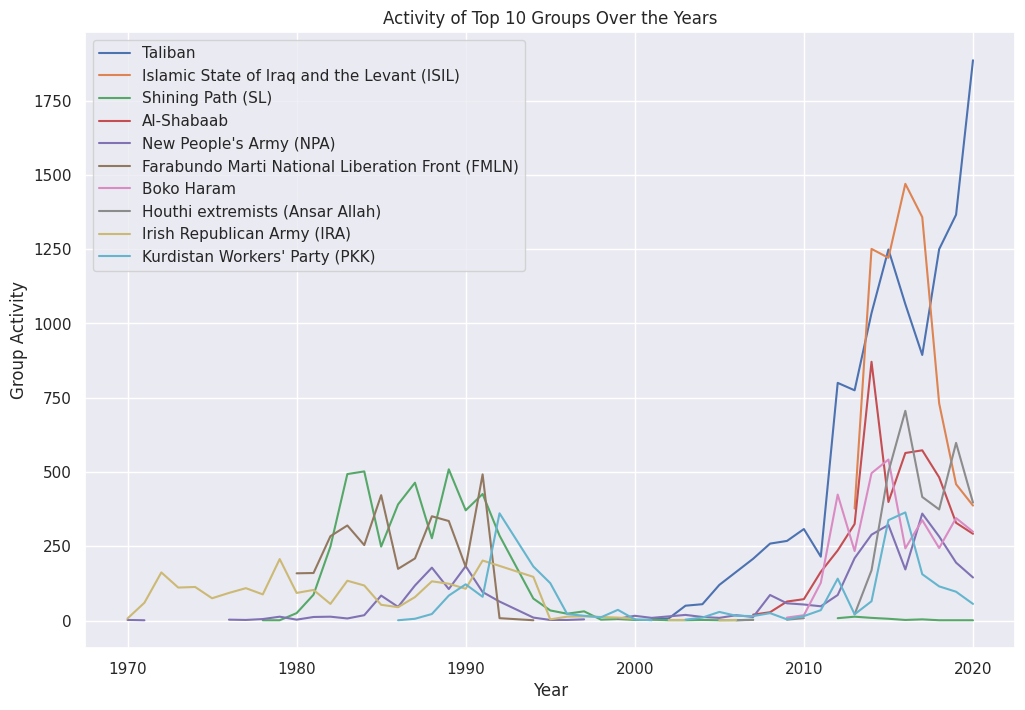

In [ ]:
# Create a line plot for each group
plt.figure(figsize=(12, 8))
for group in top_10_groups:
    plt.plot(group_activity.index, group_activity[group], label=group)

# Set the plot title and axis labels
plt.title('Activity of Top 10 Groups Over the Years')
plt.xlabel('Year')
plt.ylabel('Group Activity')
plt.legend()

# Display the plot
plt.show()

Taliban has caused thr most number of attacks

### Which are the oldest and the newest formed groups of the top 10?

In [ ]:
# Create a line plot using Plotly
fig = px.line(top_10_data, x='Year', y='Group', color='Group')

# Set the plot title and axis labels
fig.update_layout(title='Activity of Top 10 Groups Over the Years',
                  xaxis_title='Year',
                  yaxis_title='Group Activity')

# Display the plot
fig.show()

Looks like NPA is the oldest of the top 10 groups
IRA has been inactive since 2011

Farabundo Marti National Liberation Front was only active from 1978 to 1994

ISIL is relatively new among the top 10

## Comparing the number of attacks and the number of people killed in those attacks in the top 15 countries

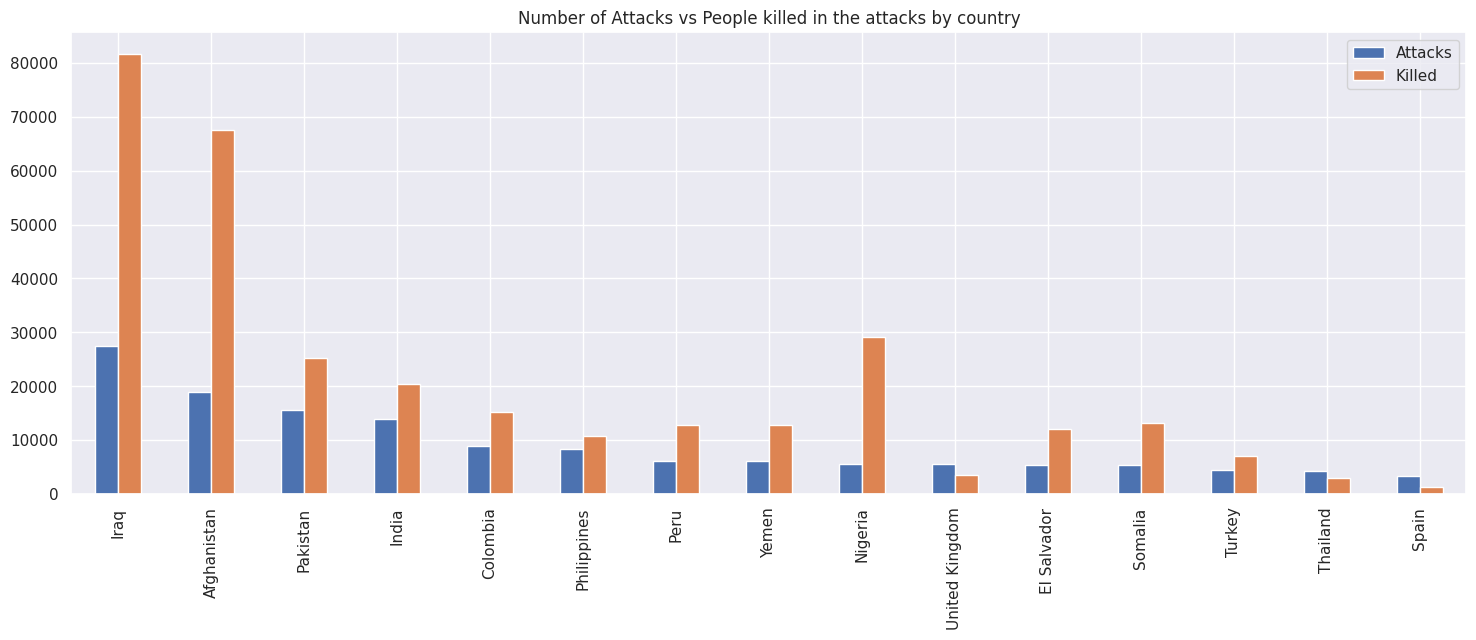

In [ ]:
attacks_vs_death= df['Country'].value_counts()[:15].to_frame()
attacks_vs_death.columns=['Attacks']
death_count= df.groupby('Country')['Killed'].sum().to_frame()
attacks_vs_death.merge(death_count, left_index = True, right_index= True, how='left').plot(kind='bar')
plt.title('Number of Attacks vs People killed in the attacks by country')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## Which are the 10 most gruesome attacks?

In [ ]:
top_10_attacks = df.nlargest(10, ['Killed', 'Wounded'])

- Iraq (2014): In Tikrit, there were 6 attacks involving hostage-taking by the Islamic State of Iraq and the Levant (ISIL). These attacks resulted in a total of 3,934 deaths, making it the deadliest attack in the dataset.

- United States (2001): The 9/11 attacks in New York City involved hijackings by Al-Qaida. Two separate incidents targeting American and United Airlines resulted in a total of 12,263 deaths.

- Rwanda (1994): In Gikoro, Hutu extremists carried out an armed assault on a Catholic church, killing 1,180 Tutsi refugees.

- Iraq (2014): In Sinjar, another attack by ISIL involved hostage-taking, resulting in 953 deaths.

- Ethiopia (2020): In May Cadera, hostages were taken by the Samri militia, resulting in 766 deaths.

- Iraq (2014): An armed assault occurred in Badush, targeting the Badush Prison. The attack was carried out by ISIL and resulted in 670 deaths.

- Somalia (2017): A bombing/explosion took place in Mogadishu, targeting a hotel. The attack, claimed by Al-Shabaab, resulted in 904 deaths.

- Nepal (2004): An armed assault targeted government infrastructure in the Dhading district. The Communist Party of Nepal-Maoist (CPN-M) claimed responsibility, and the attack resulted in 734 deaths.

- Syria (2014): In an unknown location in Raqqah, ISIL carried out a hostage-taking incident at the Tabqa Airbase, resulting in 517 deaths.

- Iraq (2014): In another attack by ISIL, this time in Nineveh, armed assault was carried out on the Yizidi civilians. The attack resulted in 3934 deaths.

In [ ]:
def point_size(killed):
    if killed < 10:
        return 5
    elif killed < 50:
        return 10
    elif killed < 100:
        return 15
    else:
        return 20

In [ ]:
map5 = folium.Map(location=[0, 0], tiles='cartodbdark_matter', zoom_start=2)
for _, row in top_10_attacks.iterrows():
    location = [row['latitude'], row['longitude']]
    city = row['city']
    killed = row['Killed']
    wounded = row['Wounded']
    target = row['Target_type']
    weapon = row['Weapon_type']

    folium.CircleMarker(location,
                        popup='<b>CITY:</b> {}<br><b>Killed:</b> {}<br><b>Wounded:</b> {}<br><b>Target:</b> {}<br><b>Weapon:</b> {}'.format(city, killed, wounded, target, weapon),
                        radius=point_size(killed)).add_to(map5)

map5


## Motives over the years 🧩




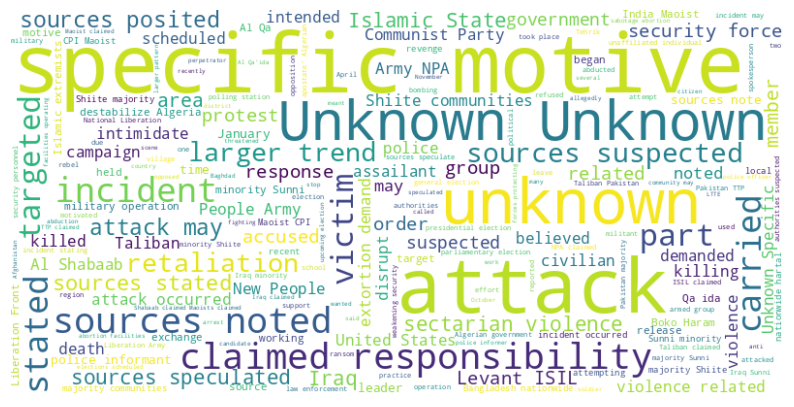

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df["Motive"].dropna())
wordcloud= WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

looks like most of the motives are unknown and alot of them are specific.

## The Big Four

Here we visualise the global attacks over the years in the top 4 most attacks countries - Iraq, Afghanistan, Pakistan, and India.

first lets create a function that takes in the country and displays the needed graphs

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

def create_visualizations(df, country):
    # Number of Attacks by Year
    attacks_by_year = df.loc[df['Country'] == country]['Year'].value_counts().sort_index()
    fig1 = go.Figure(data=go.Bar(x=attacks_by_year.index, y=attacks_by_year.values,
                                marker=dict(color='purple')))
    fig1.update_layout(title='Number of Attacks by Year in ' + country,
                       xaxis_title='Year', yaxis_title='Number of Attacks')

    # Most Active Groups
    most_active_groups = df.loc[df['Country'] == country]['Group'].value_counts().nlargest(5)
    fig2 = px.bar(most_active_groups, x=most_active_groups.index, y=most_active_groups.values,
                  title='Most Active Groups in ' + country,
                  labels={'x': 'Group', 'y': 'Number of Attacks'})

    # Top 5 Target Types
    top_target_types = df.loc[df['Country'] == country]['Target_type'].value_counts().nlargest(5)
    fig3 = px.pie(top_target_types, values=top_target_types.values, names=top_target_types.index,
                  title='Top 5 Target Types in ' + country)

    # Number of Deaths in the mentioned country
    deaths_country = df.loc[df['Country'] == country]['Killed'].sum()
    fig4 = go.Figure(data=go.Indicator(
        mode="number",
        value=deaths_country,
        title={'text': 'Number of Deaths in ' + country + ' due to terrorist attacks from 1970 to 2020'},
    ))

    # Top 10 Major Attacks in the Country
    top_attacks = df.loc[df['Country'] == country].nlargest(10, 'Killed')
    fig5 = px.scatter_mapbox(top_attacks, lat='latitude', lon='longitude', hover_name='city',
                             size='Killed', color='Killed', size_max=30,
                             title='Top 10 Major Attacks in ' + country,
                             mapbox_style='carto-positron', zoom=3)

    # Display the visualizations
    fig1.show()
    fig2.show()
    fig3.show()
    fig4.show()
    fig5.show()


### Iraq 🇮🇷

Iran witnessed a rise in terrorism from 2003 until 2014 and then a decline.

The highest number of attacks were in 2014 at 3934.

Islamic State of Iraq and the Levant is the most active known terrorist group.

Private citizens and properties and Military are the most Targetted.

Tikrit has seen the worst attack in the country

In [ ]:
create_visualizations(df = df, country = 'Iraq');

#please scroll through the output cell

### Afghanistan 🇦🇫

Afghanistan witnessed a rise in terrorism from 2002 until 2020.

The highest number of attacks were in 2020 at 2604.

Taliban is the most active known terrorist group.

Police and Military are the most Targetted.

Ghazni has seen the worst attack in the country

In [ ]:
create_visualizations(df = df, country = 'Afghanistan');
#please scroll through the output cell

### India 🇮🇳

Among the big 4, India has seen over 10 terrorist attacks every year since 1979.

From 2008 until 2020, the country has been subjected to over 400 attacks every year

The highest number of attacks were in 2016 at 1027.

CPI- Maoist is the most active known terrorist group.

Private citizens and properties and Police are the most Targetted.

Mumbai has seen the worst attack in the country

In [ ]:
create_visualizations(df = df, country = 'India');
#please scroll through the output cell

### Pakistan 🇵🇰

Pakistan witnessed a rise in terrorism from 2004 until 2013 and then a decline.

The highest number of attacks were in 2013 at 2215.

Tehrik-i-Taliban Pakistan  is the most active known terrorist group.

Private citizens and properties and Police are the most Targetted.

Darengarh has seen the worst attack in the country

In [ ]:
create_visualizations(df = df, country = 'Pakistan');
#please scroll through the output cell

## All findings 📌


  


### **General:**

- The year with the most number of attacks is 2014.

- The year with the least number of attacks is 1971.

- The dataset does not have data for the year 1993.

- From 2010 to 2014, there was a massive spike in the number of terrorist attacks, followed by a downward slope.

- Out of the total number of global terrorist attacks, 88% (185,302 attacks) have been successful.

- The big 4 Countries contribute to 40.6% of the deaths of the world all over the world due to terrorist attacks


### **Country-specific:**

- Iraq has the most number of attacks.

- Vatican City has the least number of attacks.

- Iraq, Afghanistan, Pakistan, and India have experienced over 10,000 terrorist attacks from 1970 to 2020.


### **Top 10 attacks:**

The deadliest attack in the dataset occurred in Iraq (2014) in Tikrit. It involved six hostage-taking incidents by ISIL, resulting in 3,934 deaths.
The 9/11 attacks in the United States (2001) involved hijackings by Al-Qaida, resulting in a total of 12,263 deaths.

In Rwanda (1994), Hutu extremists carried out an armed assault on a Catholic church in Gikoro, resulting in the deaths of 1,180 Tutsi refugees.
In Sinjar, Iraq (2014), ISIL conducted an attack involving hostage-taking, resulting in 953 deaths.

Ethiopia (2020) experienced hostage-taking incidents in May Cadera, conducted by the Samri militia, resulting in 766 deaths.

Another attack by ISIL took place in Badush, Iraq (2014), targeting the Badush Prison and resulting in 670 deaths.

Somalia (2017) witnessed a bombing/explosion in Mogadishu, targeting a hotel and causing 904 deaths. The attack was claimed by Al-Shabaab.

Nepal (2004) experienced an armed assault on government infrastructure in the Dhading district. The attack was claimed by the Communist Party of Nepal-Maoist (CPN-M) and resulted in 734 deaths.

Syria (2014) witnessed a hostage-taking incident by ISIL at the Tabqa Airbase in an unknown location in Raqqah, resulting in 517 deaths.

In Nineveh, Iraq (2014), an armed assault was carried out by ISIL, targeting Yizidi civilians and causing 3,934 deaths.



### **Regional trends:**

Western Europe saw a rise in the number of attacks from 1970 to 1979, followed by a drop until 1982. The number of attacks remained steady until 1990, experienced a rise until 1992, and has remained below 350 per year since 2000.

Sub-Saharan Africa saw a significant rise in attacks from 2009 (302 attacks per year) to over 2,000 attacks per year in 2014. The number of attacks has remained around the 2,000 mark until 2020.

South-East Asia experienced a steep rise in attacks from 2011 (356 attacks) to 2013 (1,188 attacks), followed by a steady decline. In 2020, there were 419 attacks.

South Asia has witnessed a steady rise in attacks, from 136 in 1998 to 4,997 attacks in 2014, with a slight decline afterward.

South America saw over 1,000 attacks between 1984 and 1993, followed by a steep decline. The number of attacks has remained below 310 since 1998.

The North American region witnessed the highest number of attacks in 1972 and has remained below 200 attacks since then.

The Middle East and North Africa region has faced the most number of attacks, with the highest number occurring in 2014 (6,996 attacks). This factor contributes to 2014 being the most dangerous year.

Eastern Europe generally had less than 300 attacks until 2013 when a sudden spike occurred, reaching a total of 963 attacks.

East Asia has seen less than 100 attacks per year.

Central Asia had no attacks until 1990, but in 1992, there were 77 attacks. Since 1997, the number of attacks per year has remained below 50.

The Central America and Caribbean region experienced a high number of attacks between 1980 and 1992, ranging from 200 to 1,148 attacks per year. Since 1998, the region has faced less than 20 attacks.

Australia and Oceania have faced less than 30 attacks per year.


### **Additional trends:**

The Middle East and North African region witnessed the highest number of deaths in 2014, with 1,700 deaths.

Private properties and citizens are the most preferred target type, accounting for over 50,000 attacks.

Attacks on the military result in the most number of deaths.

Bombing is the most preferred form of attack.

Explosives are the most preferred type of weapon, followed by firearms.

The Taliban has caused the most number of attacks.

NPA is the oldest of the top 10 groups, while IRA has been inactive since 2011.

Farabundo Marti National Liberation Front was active from 1978 to 1994.

ISIL is relatively new among the top 10 groups.


### **THE BIG 4:**

**Iraq:**

Iraq witnessed a rise in terrorism from 2003 until 2014, followed by a decline.
The highest number of attacks occurred in 2014, with 3,934 attacks.
The Islamic State of Iraq and the Levant (ISIL) is the most active known terrorist group.
Private citizens and properties, as well as the military, are the most targeted.
Tikrit has seen the worst attack in the country.

**Afghanistan:**

Afghanistan witnessed a rise in terrorism from 2002 until 2020.
The highest number of attacks occurred in 2020, with 2,604 attacks.
The Taliban is the most active known terrorist group.
Police and the military are the most targeted.
Ghazni has seen the worst attack in the country.

**India:**

India has experienced over 10 terrorist attacks every year since 1979.
From 2008 until 2020, the country has been subjected to over 400 attacks every year.
The highest number of attacks occurred in 2016, with 1,027 attacks.
CPI-Maoist is the most active known terrorist group.
Private citizens and properties, as well as the police, are the most targeted.
Mumbai has seen the worst attack in the country.

**Pakistan:**

Pakistan witnessed a rise in terrorism from 2004 until 2013, followed by a decline.
The highest number of attacks occurred in 2013, with 2,215 attacks.
Tehrik-i-Taliban Pakistan is the most active known terrorist group.
Private citizens and properties, as well as the police, are the most targeted.
Darengarh has seen the worst attack in the country.



*Please note that the information provided is based on the given dataset and may not reflect the most up-to-date situation.*

# 10. Future Directions
     Here are some potential areas for further analysis or research in the study of global terrorism patterns:

**Emerging Trends: **Investigate the emergence of new terrorist groups, ideologies, or tactics, and their impact on global terrorism patterns. Analyze the reasons behind their rise and assess their potential future trajectory.

**Cyberterrorism:** Explore the evolving landscape of cyberterrorism and its implications for global security. Examine the relationship between traditional terrorist activities and cyber capabilities, and analyze the effectiveness of countermeasures.

**Lone Wolf Terrorism:** Investigate the dynamics and characteristics of lone wolf terrorists, including their radicalization process, motivations, and methods. Assess the impact of lone wolf attacks on global terrorism patterns and develop strategies to detect and prevent such incidents.

**Gender and Terrorism:** Examine the role of gender in terrorism, both in terms of the involvement of women in terrorist activities and the use of gendered narratives by terrorist groups. Analyze the impact of gender dynamics on global terrorism patterns and counterterrorism efforts.

**Socioeconomic Factors:** Study the socioeconomic conditions and grievances that contribute to the recruitment and radicalization of individuals into terrorist groups. Analyze how economic, educational, and social inequalities correlate with the prevalence of terrorism in different regions.

**Online Radicalization:** Investigate the influence of online platforms and social media on the radicalization process. Examine the strategies used by terrorist groups to recruit and radicalize individuals online and assess the effectiveness of countermeasures.

**Counterterrorism Strategies:** Evaluate the effectiveness of various counterterrorism strategies employed by different countries and international organizations. Identify best practices and areas for improvement in preventing and mitigating terrorist attacks.

**Terrorist Financing:** Analyze the financial networks and mechanisms that support terrorist organizations. Investigate the sources of terrorist financing, including illicit activities and external funding, and explore strategies to disrupt these networks.

**Regional Analysis**: Conduct in-depth regional studies to understand the specific dynamics of terrorism in different parts of the world. Examine the historical, political, and cultural factors that contribute to terrorism in specific regions and identify region-specific counterterrorism approaches.

**Long-Term Trends:** Study the long-term trends in global terrorism patterns to identify patterns, cycles, or shifts in terrorist activities over time. Analyze historical data and project future scenarios to inform proactive counterterrorism strategies.

These research directions and additional variables can enhance the understanding of global terrorism patterns and contribute to more effective counterterrorism efforts worldwide.


We can also combine this dataset with other datasets like human freedom index dataset GDP dataset, world indicators dataset to find various links and correlations.

#  References

- https://www.kaggle.com/datasets/START-UMD/gtd
- https://github.com/plotly/plotly.py
- https://www.start.umd.edu/gtd/
- https://www.geeksforgeeks.org/
- https://www.analyticsvidhya.com/